<a href="https://colab.research.google.com/github/santhoshmc/machine-learning/blob/main/MachineLearning_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps to follow

1. Read the data/ Load the data
2. Data Preprocessing/ Cleaning
3. Feature Engineering/ Encoding
4. Selecting Features(X) and Target Column(Y)
5. Prepare train and Test set
6. Select the model/ Import the model from sklearn
7. Train the model using train data set
8. Evaluate the model using test data set
9. Save the model/Deploy the model



Use Logistic regression model from sklearn to classify data from the `iris` dataset specifically `setosa` vs `versicolor` .generate a scatter plot of the data with different colour per class. Then line plot of the models decision boudary on the top.

In [2]:
import seaborn as sns

In [3]:
irisdf=sns.load_dataset("iris")
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
irisdf.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
reqdf=irisdf[['petal_length','petal_width','species']]
reqdf.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [6]:
mask=reqdf['species'].isin(['setosa','versicolor'])
mask

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [7]:
reqdf[mask]

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
95,4.2,1.2,versicolor
96,4.2,1.3,versicolor
97,4.3,1.3,versicolor
98,3.0,1.1,versicolor


In [8]:
reqdf=reqdf[mask]

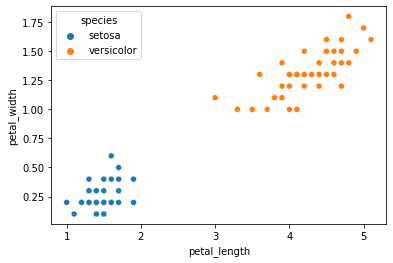

In [9]:
sns.scatterplot(data=reqdf, x='petal_length', y='petal_width', hue='species');


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Initialize the label encoder
le=LabelEncoder()

# Fitting the label encoder
le.fit(reqdf['species'])

print(le.classes_)

['setosa' 'versicolor']


In [12]:
# Tranforming the species coloumn
y=le.transform(reqdf['species'])

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
X=reqdf[['petal_length','petal_width']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((67, 2), (33, 2), (67,), (33,))

Steps to Apply sklearn machine learning models
1. Import the model from sklearn
2. Initialise the model with proper hyper parameters if any
3. train/fit the model on the train dataset
4. Evaluate the model on test dataset
5. Save the model



In [18]:
#Import the model from sklearn
from sklearn.linear_model import LogisticRegression

In [19]:
#initialise the model
model=LogisticRegression()

In [21]:
#Train the model
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
#Evaluate the model
y_hat=model.predict(X_test)

In [23]:
y_hat

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [24]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [25]:
sum(y_hat!=y_test)

0

In [26]:
def boundary_fn(model):
  m=-model.coef_[0][0]/model.coef_[0][1]
  q=-model.intercept_[0]/model.coef_[0][1]
  decision_boundary_fn=lambda x: m*x+q
  return decision_boundary_fn


In [27]:
petal_length=reqdf['petal_length']

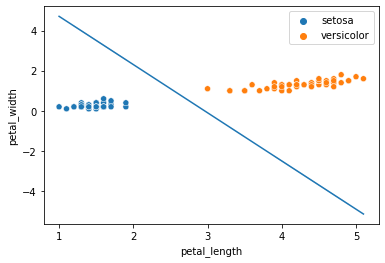

In [30]:
import matplotlib.pyplot as plt
sns.scatterplot(data=reqdf, x='petal_length', y='petal_width', hue='species')
boundary_line=boundary_fn(model)
sns.lineplot(x=petal_length,y=boundary_line(petal_length))
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [34]:
conf_mat=confusion_matrix(y_test,y_hat)

In [35]:
conf_mat

array([[19,  0],
       [ 0, 14]])

In [36]:
import numpy as np
classes=np.unique(reqdf['species'])

In [37]:
classes

array(['setosa', 'versicolor'], dtype=object)

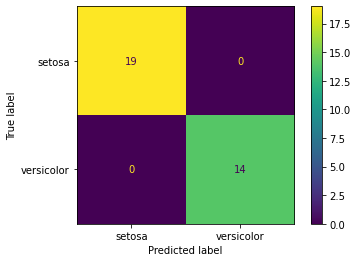

In [39]:
ConfusionMatrixDisplay(conf_mat,display_labels=classes).plot();

In [40]:
import pandas as pd
conf_df=pd.DataFrame(conf_mat, columns=classes, index=classes)
conf_df

,setosa,versicolor
setosa,19,0
versicolor,0,14


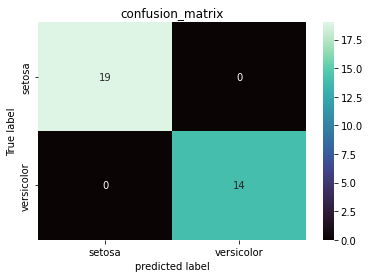

In [41]:
ax=sns.heatmap(conf_df,
               annot=True,
               cmap=sns.color_palette('mako', as_cmap=True))
ax.title.set_text('confusion_matrix')
ax.set(xlabel='predicted label', ylabel='True label')
plt.show()

# Regression Example

In [1]:
import numpy as np
import pandas as pd


In [2]:
path="https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"

In [3]:
addf=pd.read_csv(path)
addf.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
addf.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
addf.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
#Shpe of Ad dataset
print(addf.shape )

(200, 4)


In [8]:
addf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
addf.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


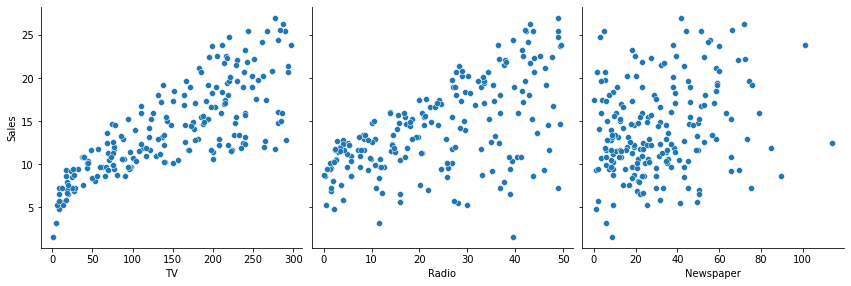

In [13]:
sns.pairplot(addf,x_vars=['TV','Radio','Newspaper'],
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

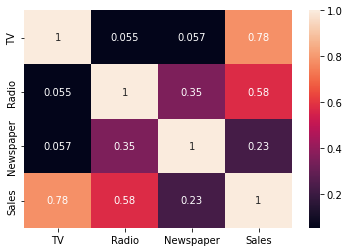

In [14]:
sns.heatmap(addf.corr(),annot=True)
plt.show()

In [15]:
# Create x and y
X=addf['TV']
y=addf['Sales']

In [16]:
# Splitting the variable in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7, random_state=42)

In [17]:
print(X_train.shape, y_train.shape)

(140,) (140,)


In [18]:
print(X_test.shape, y_test.shape)

(60,) (60,)


## Trying out with Stats model

In [19]:
import statsmodels.api as sm

In [20]:
# Adding a constant to get an intercept
X_train_sm=sm.add_constant(X_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
print(X_train_sm)

     const     TV
169    1.0  284.3
97     1.0  184.9
31     1.0  112.9
12     1.0   23.8
35     1.0  290.7
..     ...    ...
106    1.0   25.0
14     1.0  204.1
92     1.0  217.7
179    1.0  165.6
102    1.0  280.2

[140 rows x 2 columns]


In [24]:
#Fitting the regression line using OLS
lr=sm.OLS(y_train, X_train_sm).fit()

In [25]:
# Printing the parametrs
lr.params

const    7.239460
TV       0.046408
dtype: float64

In [26]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     185.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           2.55e-27
Time:                        03:03:48   Log-Likelihood:                -367.70
No. Observations:                 140   AIC:                             739.4
Df Residuals:                     138   BIC:                             745.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2395      0.604     11.986      0.000       6.045       8.434
TV             0.0464      0.003     13.625      0.000       0.040       0.053
==============================================================================
Omnibus:                        1.465   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                1.379
Skew:                          -0.125   Prob(JB):                        0.502
Kurtosis:                       2.583   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

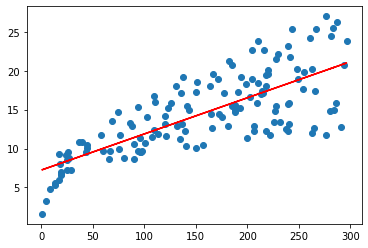

In [27]:
#Visualizing the regression line
plt.scatter(X_train,y_train)
plt.plot(X_train, 7.2395+0.0464*X_train, 'r')
plt.show()

In [28]:
#Predicting y value using train data
y_train_pred=lr.predict(X_train_sm)

# Create resuduals from th y train and predicated y data
res=y_train-y_train_pred

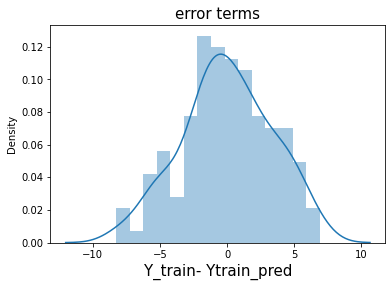

In [30]:
# Plotting the hbistpogram usning the residual values
fig=plt.figure()
sns.distplot(res, bins=15)
plt.title('error terms', fontsize=15)
plt.xlabel('Y_train- Ytrain_pred', fontsize=15)
plt.show()

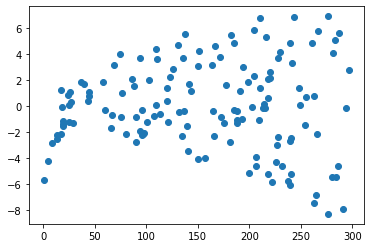

In [31]:
#Plotting residuals
plt.scatter(X_train,res)
plt.show()

In [32]:
# Adding a Constant to X_test
X_test_sm=sm.add_constant(X_test)

# Predicting the y value corresponding the X_test_sm
Y_test_pred=lr.predict(X_test_sm)
Y_test_pred

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


95     14.817854
15     16.307544
30     20.832305
158     7.782431
128    17.463099
115    10.724686
69     17.300671
170     9.559850
174    17.560555
45     15.365466
66      8.701306
182     9.847578
165    18.122089
78      7.490062
186    13.713348
177    15.138068
56      7.578237
152    16.409642
82     10.733967
68     18.256672
124    17.890050
16     10.385909
148     9.002956
93     18.883177
65     10.441598
60      9.722277
84     17.147526
67     13.704067
125    11.286220
132     7.629285
9      16.511739
18     10.450880
55     16.469972
75      8.023752
150    20.266130
104    18.293798
135     9.480957
137    19.941275
164    12.678454
76      8.515674
79     12.622765
197    15.453641
38      9.239636
24     10.130666
122    17.634808
195     9.012238
29     10.515851
19     14.075329
143    12.093716
86     10.780375
114    10.868550
173    15.054534
5       7.643208
126     7.601441
117    10.785016
73     13.244629
140    10.645793
98     20.683800
172     8.1490

In [33]:
from sklearn.metrics import r2_score

In [34]:
# Checking the r squared value
r_squared=r2_score(y_test, Y_test_pred)
print(r_squared)

0.6714477229302764


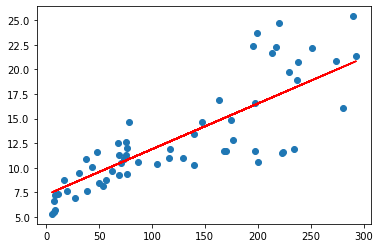

In [35]:
# Visualize the line on the testset
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_test_pred, 'r')
plt.show()

## Training with sklearn